In [1]:
import numpy as np
import sdeint
import scipy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LogNorm
import networkx as nx
import wealth_condensation as wc
import pickle
from scipy.optimize import curve_fit

In [9]:
def exponential_function(t, gamma, tau):

    return 0.9* np.exp(-np.power(t/tau, gamma)) + 0.1

In [10]:
def maggiorare(w,index):
    i=0
    while w[i]<index:
        i=i+1
        
    return i

In [11]:
def iperbole(t,a,b,c,d):
    return (a*t+b)/(c*t+d)

In [12]:
def linear_function(w,alpha,b):
    return -alpha*w+b

In [13]:
def gen_decile_list(ranks,q,N):
    
    ranks_q=np.int32(q*ranks/N)
    j=0
    
    decile=[]

    for i in range(q):
    
        M=np.zeros(len(ranks_q[:,0]))
    
    
        while j<len(ranks_q[0,:]) and ranks_q[0,j]==i :
        
            M=M=np.vstack([M,ranks_q[:,j]])
        
            j=j+1
       
        M=M[1:,:]
        decile.append(M.tolist())
        
    return decile
        

In [14]:
def get_SQM (decile,nsteps):
    
    M=M=np.zeros(nsteps)
    
    for i in range(nsteps):
        diff=decile[i,:]-decile[0,:]
        diffsq=diff*diff
        mean=np.mean(diffsq)
        M[i]=mean ** 0.5
        
    return M

In [15]:
def probability_distribution(wealth_share):
    wealth=np.log10(wealth_share)
    wealth=wealth.reshape(-1)
    wealth=np.sort(wealth)
    
    
    intervals=np.linspace(wealth[0], wealth[-1], 100)
    dw=intervals[1]-intervals[0]
    wealth_av=np.zeros(len(intervals)-1)
    
    for i in range(len(intervals)-1):
        wealth_av[i]=(np.power(10,intervals[i])+np.power(10,intervals[i+1]))/2
        
    p=np.zeros(len(intervals)-1)
    count=np.zeros(len(intervals)-1)
    
    for i in range(len(intervals)-1):
        for j in range(len(wealth)):
            if intervals[i]<=wealth[j]<intervals[i+1]:
                   count[i]=count[i]+1
                    
        p[i]=(count[i]/dw)*(1/wealth_av[i])
    
    return wealth_av,p

In [2]:
## define parameters
N=1000
m=0.5
s=1
mu=0.1
sigma=1
phi=0.
f=0.
sigmat=0.
c=4
J0s=[0.01,0.02,0.05,0.1,0.2,0.5,1,2,5]
t_tot=30
dt=.01
n_step=int(t_tot/dt)
df1=pd.DataFrame(columns=["sim","J0","Wealth_Share"])
G=nx.random_regular_graph(c,N)
A0=nx.to_numpy_array(G)
sim=20
n_step_true=int(n_step/3)

In [13]:
for i in range(sim):
    for J0 in J0s:
        A,B=wc.simulate.interaction_matrix(N,mu,sigmat,m,phi,f,J0,A0,sigma,s,c)
        ## initial conditions
        x=np.ones(N+1)
        result=wc.simulate.integrate_sde(x,A,B,t_tot,dt)
        result=result[int(2*n_step/3):,:]
        result=result[:,:N]
   
        tot_wealth=result.sum(axis=1)
        wealth_share=result/tot_wealth.reshape(-1,1)
    
    
        df0 = pd.DataFrame({"sim":[sim],"J0":[J0],"Wealth_Share": [wealth_share]})
        df1=pd.concat([df1,df0])

KeyboardInterrupt: 

In [ ]:
df1.to_pickle("/home/simone/Scrivania/Tesi/wealth.p.gz")

In [3]:
dw=pd.read_pickle("/home/simone/Scrivania/Tesi/data/Regular/wealth.p.gz")

In [ ]:
wealths=[]
for i in range(len(J0s)):
    wealth=dw.iat[i,2]
    j=9
    while i < 180:
        wealth = np.append(wealth,dw.iat[j,2])
        j=j+9
    wealths.append(wealth)

In [3]:
wealth1=dw.iat[0,2]
wealth2=dw.iat[1,2]
wealth3=dw.iat[2,2]
wealth4=dw.iat[3,2]
wealth5=dw.iat[4,2]
wealth6=dw.iat[5,2]
wealth7=dw.iat[6,2]
wealth8=dw.iat[7,2]
wealth9=dw.iat[8,2]
i=9
while i < 180:
    wealth1 = np.append(wealth1,dw.iat[i,2])
    wealth2 = np.append(wealth2,dw.iat[i+1,2])
    wealth3 = np.append(wealth3,dw.iat[i+2,2])
    wealth4 = np.append(wealth4,dw.iat[i+3,2])
    wealth5 = np.append(wealth5,dw.iat[i+4,2])
    wealth6 = np.append(wealth6,dw.iat[i+5,2])
    wealth7 = np.append(wealth7,dw.iat[i+6,2])
    wealth8 = np.append(wealth8,dw.iat[i+7,2])
    wealth9 = np.append(wealth9,dw.iat[i+8,2])
    i=i+9
  

In [8]:
dp=pd.DataFrame(columns=["J0","Wealth","Probability"])
wealths = [wealth1,wealth2,wealth3,wealth4,wealth5,wealth6,wealth7,wealth8,wealth9]


In [9]:
for i in range(len(J0s)):
    wealth_graph,p=wc.probability_distribution(wealths[i],90)
    dp0=pd.DataFrame({"J0":[J0s[i]],"Wealth": [wealth_graph],"Probability":[p]})
    dp=pd.concat([dp,dp0])
    
dp.to_pickle("/home/simone/Scrivania/Tesi/probability.p.gz")   

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/simone/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3505, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_5290/2012246322.py", line 2, in <module>
    wealth_graph,p=wc.probability_distribution(wealths[i],90)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/simone/Scrivania/Tesi/wealth_condensation-main/python/wealth_condensation.py", line -1, in probability_distribution
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/simone/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 2102, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/simone/anaconda3/lib/python3.11/site-packages/IPython/core/ultratb.py", line 1310, in structured_traceback
    re

In [16]:
dp=pd.read_pickle("/home/simone/Scrivania/Tesi/data/Regular/probability.p.gz")

In [17]:
index=[-7,-6,-5.5,-5,-4,-2.4,-2.4,-2.3,-2]

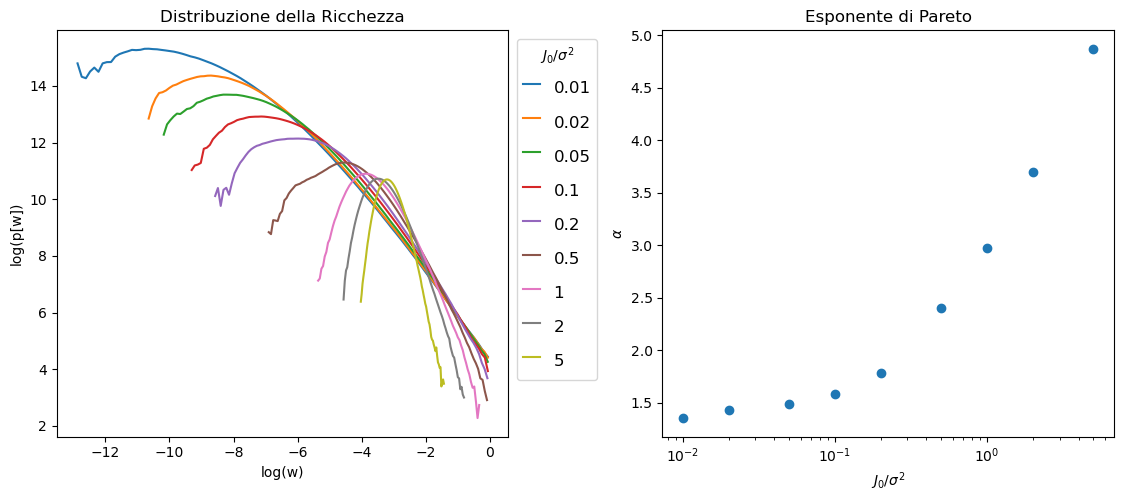

In [18]:
fig, axs=plt.subplots(1,2)
alpha=np.zeros(len(J0s))
for i in range(len(J0s)):
    
    w=np.log10(dp.iat[i,1])
    p=np.log10(dp.iat[i,2])
    k=maggiorare(w,index[i])
    x=w[k:]
    y=p[k:]
    axs[0].plot(w,p,label=str(J0s[i]))
    axs[0].set_xlabel("log(w)")
    axs[0].set_ylabel("log(p[w])")
    axs[0].legend(title="$J_0$/$\sigma^2$",loc="upper left",bbox_to_anchor=(1, 1), fontsize="large",handlelength=1,handleheight=2)
    axs[0].set_title('Distribuzione della Ricchezza')

    
    param_prelim, cov_prelim = curve_fit(linear_function,x,y)
    alpha[i]=param_prelim[0]
    
axs[1].scatter(J0s,alpha)
axs[1].set_xscale('log')
axs[1].set_title('Esponente di Pareto')
axs[1].set_xlabel("$J_0$/$\sigma^2$")
axs[1].set_ylabel(r'$\alpha$')

fig.tight_layout(pad=-3)
    
fig.set_size_inches(10, 4)
plt.savefig("/home/simone/Scrivania/Tesi/wealth_condensation-main/Figure/Regular/probability.png",bbox_inches="tight")


In [9]:
d_q=[]

In [10]:
for i in range(len(J0s)):
    par=np.argsort(dw.iat[i,2][0,:])
    w=dw.iat[i,2][:,par]
    
    rank=np.argsort(w, axis=1)
    df_r=pd.DataFrame(data=rank)
    rank_q=np.int32(10*df_r/N)
    
    df_q=pd.DataFrame(data=rank_q)
    
    d_q.append(df_q)
    

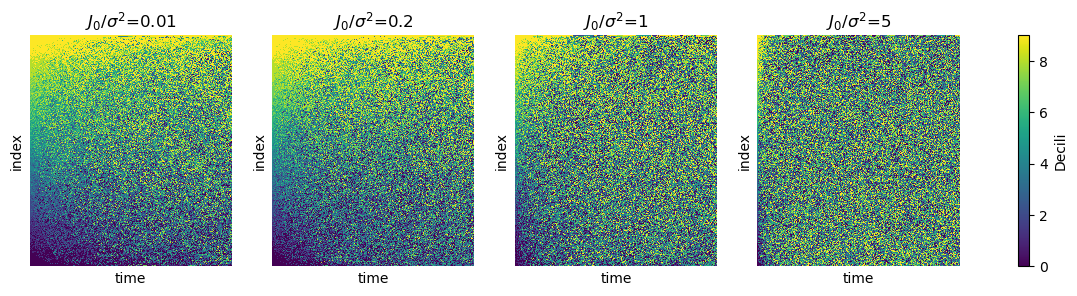

In [35]:
fig, axs = plt.subplots(1,4)
sns.heatmap(d_q[0].T[::-1],ax=axs[0], cmap="viridis",cbar=False,xticklabels=False, yticklabels=False)

axs[0].set_title('$J_0$/$\sigma^2$=0.01')
axs[0].set_xlabel('time')
axs[0].set_ylabel('index')

sns.heatmap(d_q[4].T[::-1],ax=axs[1], cmap="viridis",cbar=False,xticklabels=False, yticklabels=False)

axs[1].set_title('$J_0$/$\sigma^2$=0.2')
axs[1].set_xlabel('time')
axs[1].set_ylabel('index')

sns.heatmap(d_q[6].T[::-1],ax=axs[2], cmap="viridis",cbar=False,xticklabels=False, yticklabels=False)

axs[2].set_title('$J_0$/$\sigma^2$=1')
axs[2].set_xlabel('time')
axs[2].set_ylabel('index')

sns.heatmap(d_q[8].T[::-1],ax=axs[3], cmap="viridis",cbar=False,xticklabels=False, yticklabels=False)

axs[3].set_title('$J_0$/$\sigma^2$=5')
axs[3].set_xlabel('time')
axs[3].set_ylabel('index')

heatmaps = [axs[0].collections[0], axs[1].collections[0], axs[2].collections[0], axs[3].collections[0]]

cbar=fig.colorbar(heatmaps[0], ax=axs, location='right')
cbar.set_label('Decili')


fig.set_size_inches(15, 3)

plt.savefig("/home/simone/Scrivania/Tesi/wealth_condensation-main/Figure/Regular/decileranks.png",bbox_inches="tight")


#plt.xlim(0,1000)

In [4]:
dranks=pd.DataFrame(columns=["ranks","decile"])

In [5]:
for j in range(180):
    k=np.argsort(dw.iat[j,2][0,:])
    w=dw.iat[j,2][:,k]
    
    ranks=np.argsort(w, axis=1)
    ranks_q=np.int32(10*ranks/N)
    
    dranks0 = pd.DataFrame({"ranks": [ranks],"decile":[ranks_q]})
    dranks = pd.concat([dranks,dranks0])

In [ ]:
dranks.to_pickle("/home/simone/Scrivania/Tesi/data/Regular/ranks.p.gz") 

In [ ]:
dranks=dranks.read_pickle("/home/simone/Scrivania/Tesi/data/Regular/ranks.p.gz")

In [6]:
indexes=[]

for j in range(len(J0s)):
    index=np.zeros(len(J0s))
    for i in range(len(J0s)):
        k=0
        
        while dranks.iat[i,1][0,k]<j+1:
            k=k+1
            
        index[i]=k
        
    indexes.append(index)

In [7]:
evolution_tops=[]
evolution_bots=[]
evolution_mids=[]

time=np.arange(0,1000,50)
labels=[r'$q_9$',r'$q_8$',r"$q_7$",r"$q_6$",r"$q_5$",r"$q_4$",r"$q_3$",r"$q_2$",r"$q_1$",r"$q_0$"]


for i in range(len(J0s)):
    
    evolution_top=np.zeros((1000,10))
    evolution_bot=np.zeros((1000,10))
    evolution_mid=np.zeros((1000,10))
        
    decile_top=dranks.iat[i,1][:,int(indexes[8][i]):]
    decile_bot=dranks.iat[i,1][:,:int(indexes[0][i])]
    decile_mid=dranks.iat[i,1][:,int(indexes[4][i]):int(indexes[5][i])]
    
    
    for k in range(n_step_true):
        
        for j in range(10):
            
            norm_top=len(decile_top[0])
            pers_top=(decile_top[k]==j).sum()
            evolution_top[k,j]=pers_top/norm_top
                
            norm_bot=len(decile_bot[0])
            pers_bot=(decile_bot[k]==j).sum()
            evolution_bot[k,j]=pers_bot/norm_bot
                
            norm_mid=len(decile_mid[0])
            pers_mid=(decile_mid[k]==j).sum()
            evolution_mid[k,j]=pers_mid/norm_mid
                
                
    evolution_bot=evolution_bot[time]
    evolution_top=evolution_top[time]
    evolution_mid=evolution_mid[time]
            
    evolution_tops.append(evolution_top)
    evolution_bots.append(evolution_bot)
    evolution_mids.append(evolution_mid)
        

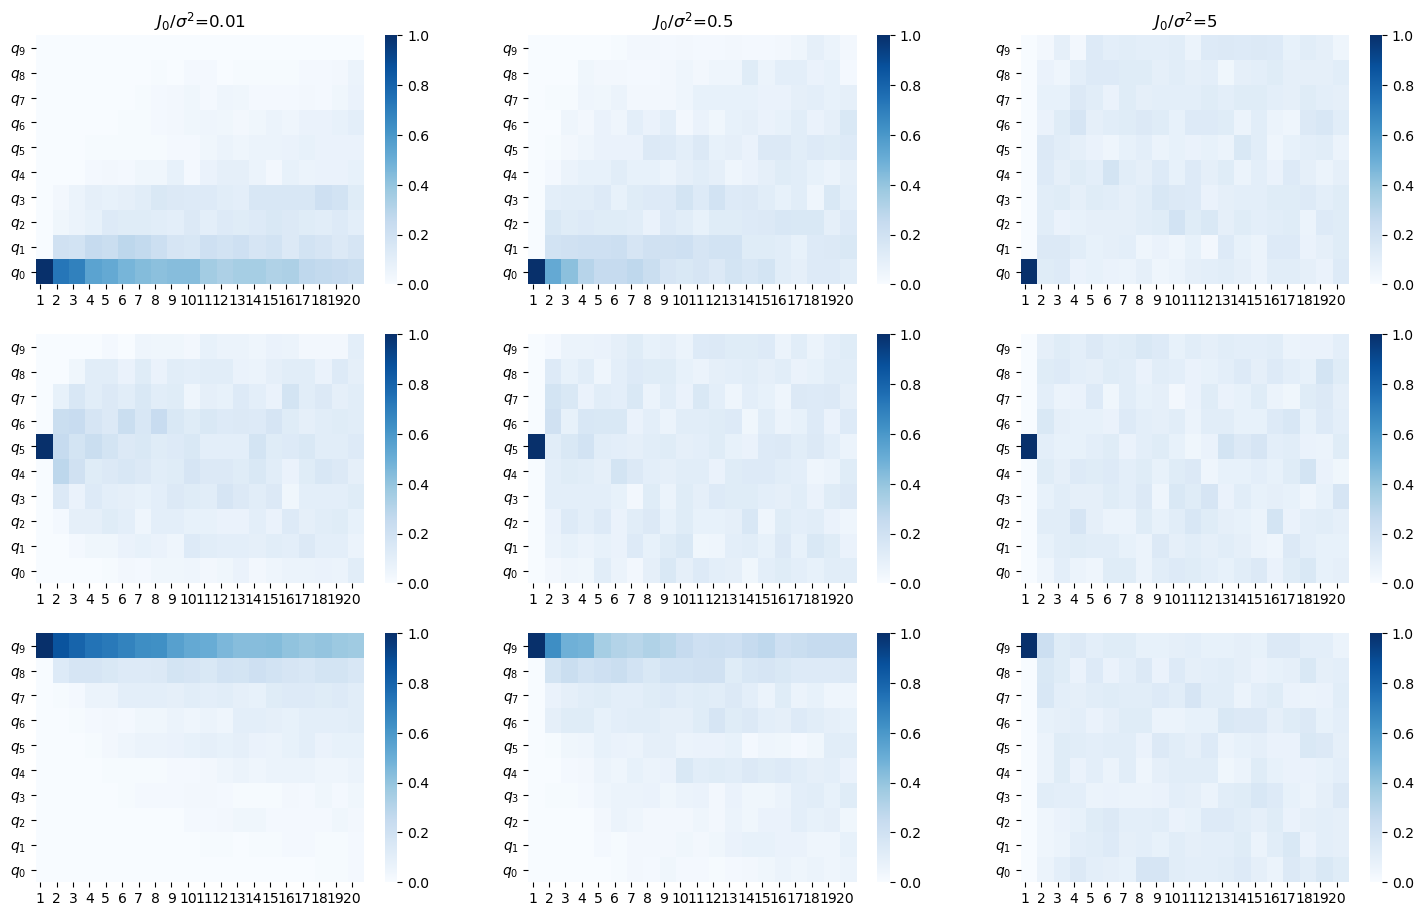

In [8]:
fig, axs = plt.subplots(3,3)

sns.heatmap(evolution_bots[0].T[::-1],ax=axs[0,0], cmap="Blues",cbar=True,xticklabels=False, yticklabels=False)

axs[0,0].set_title('$J_0$/$\sigma^2$=0.01')

sns.heatmap(evolution_mids[0].T[::-1],ax=axs[1,0], cmap="Blues",cbar=True,xticklabels=False, yticklabels=False)

#axs[1,0].set_title('Mobility ' r'$q_5$')

sns.heatmap(evolution_tops[0].T[::-1],ax=axs[2,0], cmap="Blues",cbar=True,xticklabels=False, yticklabels=False)

#axs[2,0].set_title('Mobility ' '$q_9$')


sns.heatmap(evolution_bots[5].T[::-1],ax=axs[0,1], cmap="Blues",cbar=True,xticklabels=False, yticklabels=False)

axs[0,1].set_title('$J_0$/$\sigma^2$=0.5')

sns.heatmap(evolution_mids[5].T[::-1],ax=axs[1,1], cmap="Blues",cbar=True,xticklabels=False, yticklabels=False)

#axs[1,1].set_title('Persistence q5, J=0.5')

sns.heatmap(evolution_tops[5].T[::-1],ax=axs[2,1], cmap="Blues",cbar=True,xticklabels=False, yticklabels=False)

#axs[2,1].set_title('Persistence q9, J=0.5')


sns.heatmap(evolution_bots[8].T[::-1],ax=axs[0,2], cmap="Blues",cbar=True,xticklabels=False, yticklabels=False)

axs[0,2].set_title('$J_0$/$\sigma^2$=5')

sns.heatmap(evolution_mids[8].T[::-1],ax=axs[1,2], cmap="Blues",cbar=True,xticklabels=False, yticklabels=False)

#axs[1,2].set_title('Persistence q5, J=5')

sns.heatmap(evolution_tops[8].T[::-1],ax=axs[2,2], cmap="Blues",cbar=True,xticklabels=False, yticklabels=False)

#axs[2,2].set_title('Persistence q9, J=5')








for row in axs:
    for ax in row:
        ax.set_xticks(np.arange(0.25, 20.25, 1))
        ax.set_xticklabels(np.arange(1, 21))
        ax.set_yticks(np.arange(0.5, 10.5, 1))
        ax.set_yticklabels(labels)
#plt.suptitle('Mobilità', fontsize=20)

fig.set_size_inches(18,11) 
plt.savefig("/home/simone/Scrivania/Tesi/wealth_condensation-main/Figure/Regular/mobilità.png",bbox_inches="tight")

In [ ]:
dpers=pd.DataFrame(columns=["top","mid","bot","shorrocks"])

In [ ]:
for j in range(180):
    p_top=wc.analyze.persistence_top_series(dranks.iat[j,0],N,10,n_step_true)
    p_bot=wc.analyze.persistence_bottom_series(dranks.iat[j,0],N,10,n_step_true)
    p_mid=wc.analyze.persistence_5060_series(dranks.iat[j,0],N,10,n_step_true)
    sho=s_index=wc.analyze.shorrocks_series(dranks.iat[j,0],N,10,n_step_true)
    
    dpers0 = pd.DataFrame({"top":[p_top],"mid":[p_mid],"bot": [p_bot],"shorrocks":[sho]})
    dpers = pd.concat([dpers,dpers0])

In [ ]:
dpers.to_pickle("/home/simone/Scrivania/Tesi/persistence.p.gz")  

In [21]:
dpers=pd.read_pickle("/home/simone/Scrivania/Tesi/data/Regular/persistence.p.gz")

In [22]:
tops=[]
mids=[]
bots=[]
shos=[]

In [23]:
for j in range(9):
    top=dpers.iat[j,0]
    mid=dpers.iat[j,1]
    bot=dpers.iat[j,2]
    sho=dpers.iat[j,3]
    i=9
    while i<180:
        top=top+dpers.iat[i+j,0]
        mid=mid+dpers.iat[i+j,1]
        bot=bot+dpers.iat[i+j,2]
        sho=sho+dpers.iat[i+j,3]
        i=i+9
        
    top=top/sim
    bot=bot/sim
    mid=mid/sim
    sho=sho/sim
   
    tops.append(top)
    bots.append(bot)
    mids.append(mid)
    shos.append(sho)
        

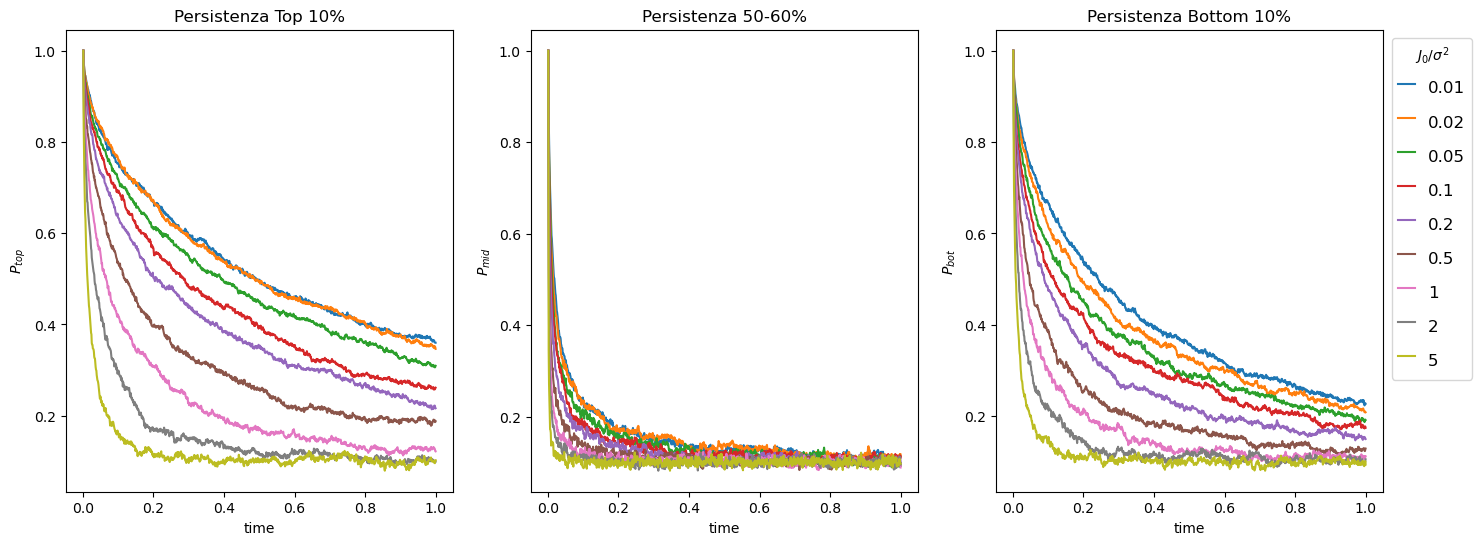

In [24]:
t=np.zeros(n_step_true)

for i in range (n_step_true):
    t[i]=(i+1)/1000
i=0
tau_top=np.zeros(len(J0s))
gamma_top=np.zeros(len(J0s))
tau_bot=np.zeros(len(J0s))
gamma_bot=np.zeros(len(J0s))

fig, axs = plt.subplots(1,3) 

for i in range(9):
    
   
    
    
    axs[0].plot(t, tops[i])
    axs[0].set_title('Persistenza Top 10%')
    axs[0].set_xlabel('time')
    axs[0].set_ylabel('$P_{top}$')
            
    axs[1].plot(t, mids[i])
    axs[1].set_title('Persistenza 50-60%')
    axs[1].set_xlabel('time')
    axs[1].set_ylabel('$P_{mid}$')
        
    axs[2].plot(t, bots[i],label=str(J0s[i]))
    axs[2].set_title('Persistenza Bottom 10%')
    axs[2].set_xlabel('time')
    axs[2].set_ylabel('$P_{bot}$')
    axs[2].legend(title="$J_0$/$\sigma^2$",loc="upper left",bbox_to_anchor=(1, 1), fontsize="large",handlelength=1,handleheight=2)
    
    
   
    
    
fig.set_size_inches(17,6)  

plt.savefig("/home/simone/Scrivania/Tesi/wealth_condensation-main/Figure/Regular/persistenza.png",bbox_inches="tight")

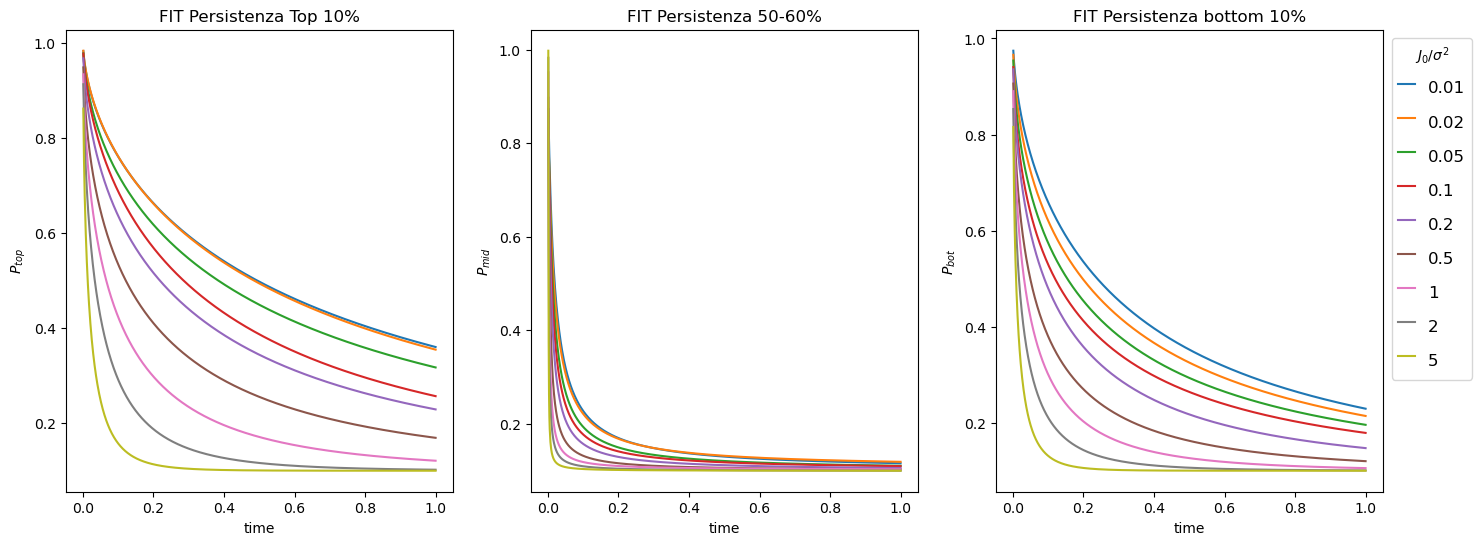

In [25]:
 fig, axs = plt.subplots(1,3)
    
for i in range(len(J0s)):
               
    limiti_parametri = ([0.0, 0.0], [1.0, 2.0])
               
    popt_top, pcov_top = curve_fit(exponential_function, t, tops[i],bounds=limiti_parametri)
    popt_bot, pcov_bot = curve_fit(exponential_function, t, bots[i],bounds=limiti_parametri)
    popt_mid, pcov_mid = curve_fit(iperbole, t, mids[i])
    
    
    tau_top[i]=popt_top[1]
    tau_bot[i]=popt_bot[1]
    gamma_top[i]=popt_top[0]
    gamma_bot[i]=popt_bot[0]
    
    axs[0].plot(t,exponential_function(t, *popt_top ))
    axs[0].set_title('FIT Persistenza Top 10%')
    axs[0].set_xlabel('time')
    axs[0].set_ylabel('$P_{top}$')
    
    axs[1].plot(t, iperbole(t,*popt_mid))
    axs[1].set_title('FIT Persistenza 50-60%')
    axs[1].set_xlabel('time')
    axs[1].set_ylabel('$P_{mid}$')
    
    axs[2].plot(t,exponential_function(t, *popt_bot ),label=str(J0s[i]))
    axs[2].set_title('FIT Persistenza bottom 10%')
    axs[2].set_xlabel('time')
    axs[2].set_ylabel('$P_{bot}$')
    axs[2].legend(title="$J_0$/$\sigma^2$",loc="upper left",bbox_to_anchor=(1, 1), fontsize="large",handlelength=1,handleheight=2)
    
    
fig.set_size_inches(17,6) 
plt.savefig("/home/simone/Scrivania/Tesi/wealth_condensation-main/Figure/Regular/FITpersistenza.png",bbox_inches="tight")

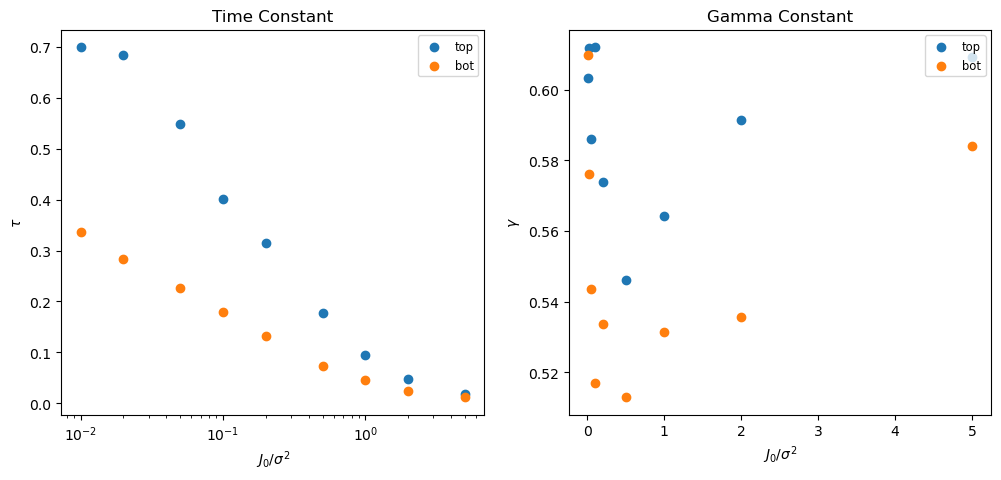

In [124]:
fig, axs=plt.subplots(1,2)


axs[0].scatter(J0s, tau_top,label='top')
axs[0].scatter(J0s, tau_bot,label='bot')
axs[0].set_title("Time Constant")
axs[0].set_xlabel('$J_0$/$\sigma^2$')
axs[0].set_ylabel(r'$\tau$')
axs[0].set_xscale('log')
axs[0].legend(loc='upper right', fontsize='small')

axs[1].scatter(J0s, gamma_top,label='top')
axs[1].scatter(J0s, gamma_bot,label='bot')
axs[1].set_title("Gamma Constant")
axs[1].set_xlabel('$J_0$/$\sigma^2$')
axs[1].set_ylabel(r'$\gamma$')
axs[1].legend(loc='upper right', fontsize='small')

fig.set_size_inches(12, 5) 
plt.savefig("/home/simone/Scrivania/Tesi/wealth_condensation-main/Figure/Regular/tau.png",bbox_inches="tight")

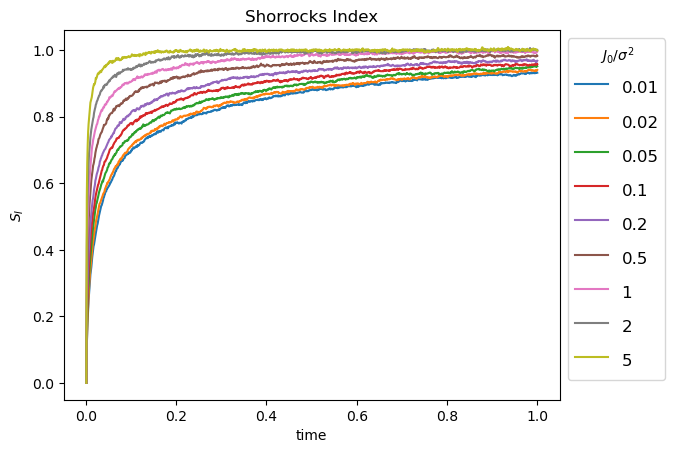

In [26]:
for i in range(9):
    
    plt.plot(t,shos[i],label=str(J0s[i]))
    i=i+1
    plt.title('Shorrocks Index')
    plt.legend(title="$J_0$/$\sigma^2$",loc="upper left",bbox_to_anchor=(1, 1), fontsize="large",handlelength=2,handleheight=2)
    plt.xlabel('time')
    plt.ylabel('$S_I$')
    plt.savefig("/home/simone/Scrivania/Tesi/wealth_condensation-main/Figure/Regular/Shorrocks.png",bbox_inches="tight")

In [45]:
dshares=pd.DataFrame(columns=["top","bot","ratio"])

In [46]:
for i in range(180):
    Y=wc.analyze.inv_part_ratio(dw.iat[i,2],N)
    top_share=wc.analyze.top10_share(dw.iat[i,2],N)
    bot_share=wc.analyze.bottom10_share(dw.iat[i,2],N)
    
    dshares0 = pd.DataFrame({"top":[top_share],"bot": [bot_share],"ratio":[Y]})
    dshares = pd.concat([dshares,dshares0])
dshares.to_pickle("/home/simone/Scrivania/Tesi/shares.p.gz")  

In [126]:
dshares=pd.read_pickle("/home/simone/Scrivania/Tesi/data/Regular/shares.p.gz")

In [127]:
Y=[]
topshare=[]
botshare=[]

In [128]:
for j in range(9):
    ratio=dshares.iat[j,2]
    top_s=dshares.iat[j,0]
    bot_s=dshares.iat[j,1]
    
    i=9
    while i<180:
        top_s=top_s+dshares.iat[i+j,0]
        
        bot_s=bot_s+dshares.iat[i+j,1]
        
        ratio=ratio+dshares.iat[i+j,2]
        
        i=i+9
        
    top_s=top_s/sim
    bot_s=bot_s/sim
   
    ratio=ratio/sim
   
    topshare.append(top_s)
    botshare.append(bot_s)
    Y.append(ratio)

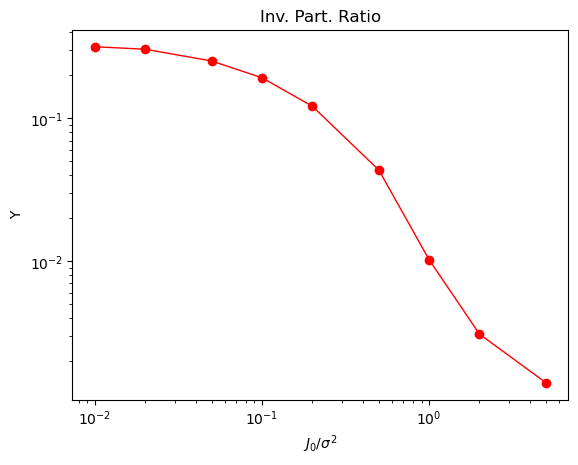

In [130]:
plt.scatter(J0s,Y, color='red')
plt.plot(J0s, Y, color='red', linestyle='-', linewidth=1)
plt.title('Inv. Part. Ratio')
plt.xscale('log') 
plt.yscale('log')
plt.xlabel('$J_0$/$\sigma^2$')
plt.ylabel('Y')
plt.savefig("/home/simone/Scrivania/Tesi/wealth_condensation-main/Figure/Regular/Ratio.png",bbox_inches="tight")

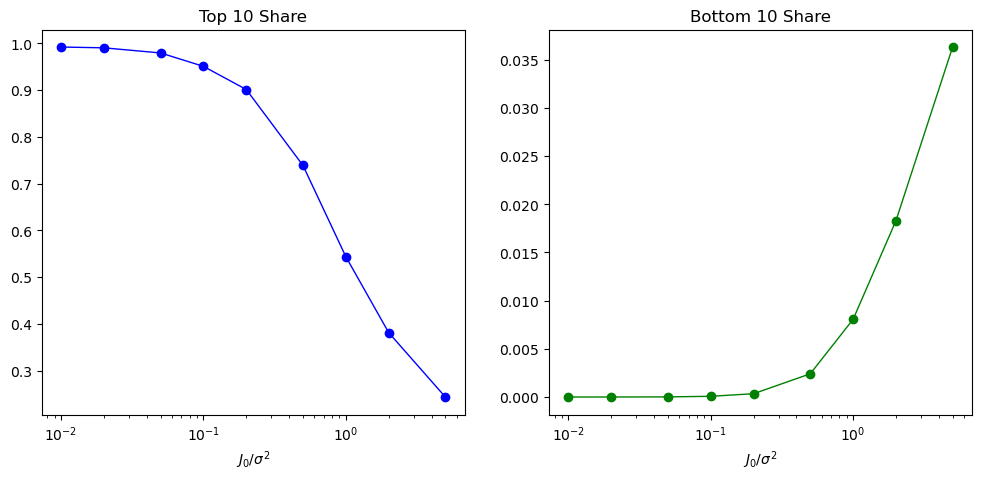

In [132]:
fig, axs=plt.subplots(1,2)


axs[0].scatter(J0s,topshare, color='blue')
axs[0].plot(J0s, topshare, color='blue', linestyle='-', linewidth=1)
axs[0].set_title("Top 10 Share")
axs[0].set_xscale('log') 
axs[0].set_xlabel('$J_0$/$\sigma^2$')

axs[1].scatter(J0s,botshare, color='green')
axs[1].plot(J0s, botshare, color='green', linestyle='-', linewidth=1) 
axs[1].set_title("Bottom 10 Share")
axs[1].set_xscale('log') 
axs[1].set_xlabel('$J_0$/$\sigma^2$')


fig.set_size_inches(12,5) 
plt.savefig("/home/simone/Scrivania/Tesi/wealth_condensation-main/Figure/Regular/Shares.png",bbox_inches="tight")

In [37]:
dq=pd.DataFrame(columns=["quan","SQM"])


In [38]:
for i in range(180):
    decile=gen_decile_list(dranks.iat[i,0],10,N)
    for j in range(10):
        q=np.array(decile[j])
        q=q.T
        M=get_SQM(q,n_step_true)
        dq0=pd.DataFrame({"quan": [quan[j]],"SQM":[M]})
        dq=pd.concat([dq,dq0])

In [45]:
dM=pd.DataFrame(columns=["SQM"])

In [46]:
for j in range(90):
    M=dq.iat[j,1]
    i=90
    while i<1800:
        M=M+dq.iat[j+i,1]
        i=i+90
        
    M=M/sim
    
    dM0=pd.DataFrame({"SQM":[M]})
    dM=pd.concat([dM,dM0])
dM.to_pickle("/home/simone/Scrivania/Tesi/SQM.p.gz")  

In [27]:
dM=pd.read_pickle("/home/simone/Scrivania/Tesi/data/Regular/SQM.p.gz")
quan=np.arange(10)

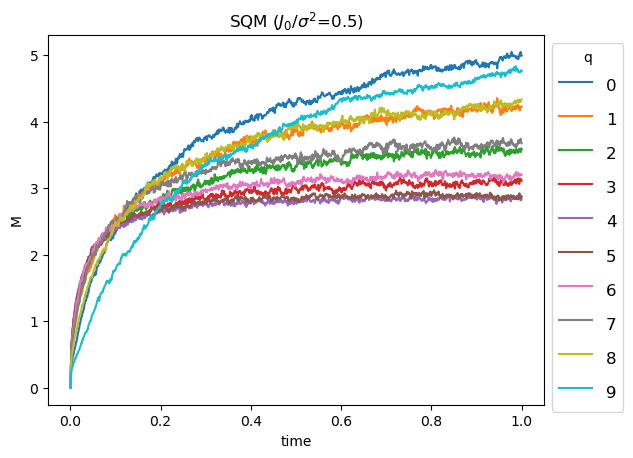

In [28]:
t=np.zeros(n_step_true)

for i in range (n_step_true):
    t[i]=(i+1)/1000

for i in range(10) :
    
    plt.plot(t,dM.iat[i+50,0],label=str(quan[i]))
    plt.title('SQM ($J_0$/$\sigma^2$=0.5)')
    plt.legend(title="q",loc="upper left",bbox_to_anchor=(1, 1), fontsize="large",handlelength=2,handleheight=2)
    plt.xlabel('time')
    plt.ylabel('M')
plt.savefig("/home/simone/Scrivania/Tesi/wealth_condensation-main/Figure/Regular/SQM.png",bbox_inches="tight")